# IDH Prediction

## Montando um gráfico com os dados adquiridos

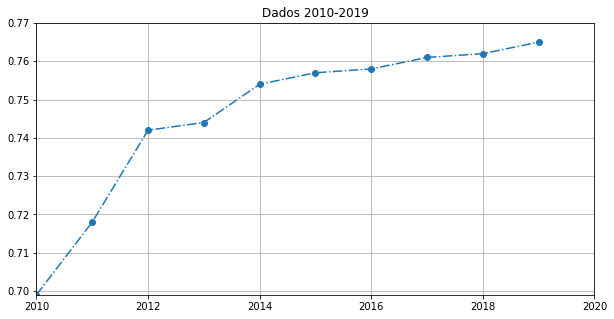

In [28]:
import matplotlib.pyplot as plt

# make data

years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
hdis = [0.699,0.718,0.742,0.744,0.754,0.757,0.758,0.761,0.762,0.765]

# plot

plt.plot(years, hdis, 'o-.')
plt.title('Dados 2010-2019')
plt.grid()
plt.axis([2010, 2020, 0.699, 0.77])
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

## Utilizando o metódo do minimos quadros linear para calcular a matriz A

In [8]:
def get_g(index, x):
    if index == 1:
        return 1
    return x

m = len(years)

matrizA = []
results = []
for i in range(1, 3):
    tmp = []
    for j in range(1,3):
        sum = 0
        for k in range(0, m):
            sum += get_g(i, years[k]) * get_g(j, years[k])
        tmp.append(sum)
    matrizA.append(tmp)

print('Matriz A:')
for row in matrizA:
    for item in row:
        print('%8d ' % item, end="")
    print()



Matriz A:
      10    20145 
   20145 40582185 


## Utilizando o metódo dos minimos quadrados para calcular os resultados

In [9]:
for i in range (1, 3):
    sum = 0
    for j in range(0, m):
        sum += hdis[j] * get_g(i, years[j])
    results.append(sum)
print("Resultados:")
for item in results:
    print(item)

Resultados:
7.46
15028.691


## Calculando resolução de sistema linear

In [10]:
def getone(pp):
    for i in range(len(matrizA[0])):
        if matrizA[pp][pp] != 1:
            q00 = matrizA[pp][pp]

            for j in range(len(matrizA[0])):
                matrizA[pp][j] = matrizA[pp][j] / q00

def getzero(r, c):
    for i in range(len(matrizA[0])):
        if matrizA[r][c] != 0:
            q04 = matrizA[r][c]
    
            for j in range(len(matrizA[0])):
                matrizA[r][j] = matrizA[r][j] - ((q04) * matrizA[c][j])


def transformMatriz (matrizA, results):
  for i, v in enumerate(results):
    matrizA[i].append(v)
    
  return matrizA

transformMatriz(matrizA, results)

for i in range(len(matrizA)):
    getone(i)

    for j in range(len(matrizA)):
        if i != j:
            getzero(j, i)

In [11]:
def takeResults():
    for i in matrizA:
      final.append(i[len(i)-1])
    
def hdiCalculator(final, ano):
  hdi = final[0] + final[1]*(ano)
  return hdi
anos_previsoes = [2020, 2021, 2022, 2023, 2024, 2025, 2026]
resultados_previsoes = []
for ano in anos_previsoes:
    final = []
    takeResults()
    resultados_previsoes.append(hdiCalculator(final, ano))

[0.7807333333333766, 0.7870484848485351, 0.7933636363636936, 0.7996787878788538, 0.8059939393940123, 0.8123090909091726, 0.8186242424243311]


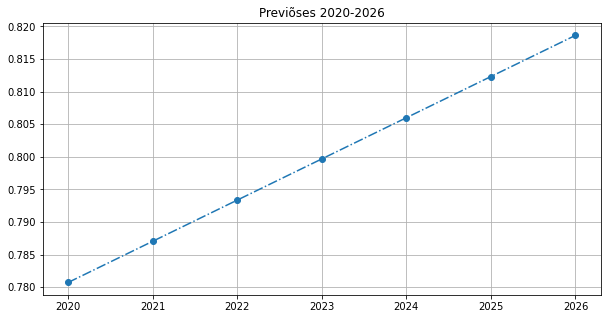

In [29]:
plt.plot(anos_previsoes, resultados_previsoes, 'o-.')
plt.rcParams['figure.figsize'] = [10, 5]
plt.grid()
plt.title('Previõses 2020-2026')
plt.show()